## Parte 1 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import csv
from random import random

%matplotlib inline
rcParams['figure.figsize'] = (10,10)

In [3]:
def anillo(R, r, c, densidad, lado): #Radio mayor, radio menor, centro, numero de puntos, lado de la caja
    x0, y0 = c
    i = 0 #Contador
    x, y = [], [] #Arreglos de las coordenadas
    
    puntos = densidad *np.pi * (R**2 - r**2)
    #Generamos los puntos aleatorios en el anillo
    while i < puntos:
        
        #X y Y son las coordenadas de los puntos
        X = lado*np.random.random()
        Y = lado*np.random.random()
        
        if (X-x0)**2 + (Y-y0)**2 > R**2 or (X-x0)**2 + (Y-y0)**2 < r**2: #Si las coordenadas estan fuera del anillo las descartamos
            continue
            
        #Agregamos al arreglo las coordenadas que esten dentro del anillo y de la caja
        if (X < lado and X > 0) and (Y < lado and Y > 0):
            x.append(X)
            y.append(Y)
        i += 1
    #Graficamos el anillo
    return x, y

In [5]:
lado = 1000 #Lado de la caja
R = 300 # Radio mayor del anillo mayor
ancho = 30 #Ancho del anillo
r = R - ancho #Radio menor del anillo mayor (radio mayor del anillo menor)
r_min = r - ancho #Radio menor del anillo menor
densidad = 0.02 #Densidad de puntos
centro = (lado * 0.5, lado * 0.5) #Centro del anillo

In [6]:
AnilloX, AnilloY = anillo(R, r, centro, densidad, lado) 
anilloX, anilloY = anillo(r, r_min, centro, densidad, lado)

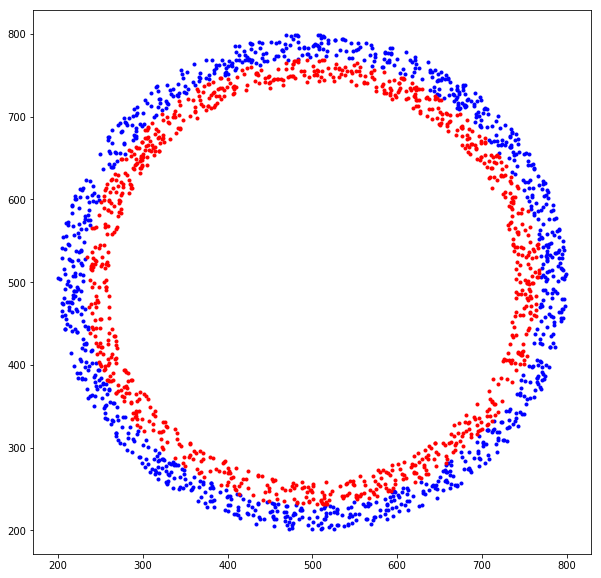

In [8]:
plt.plot(AnilloX, AnilloY, "b.")
plt.plot(anilloX, anilloY, "r.");